# **Welcome to my CNN Deep Learning Project!**

---

This project is a **Goku** and **Vegeta** Classifier,
made by **Aryaman Rao**, India

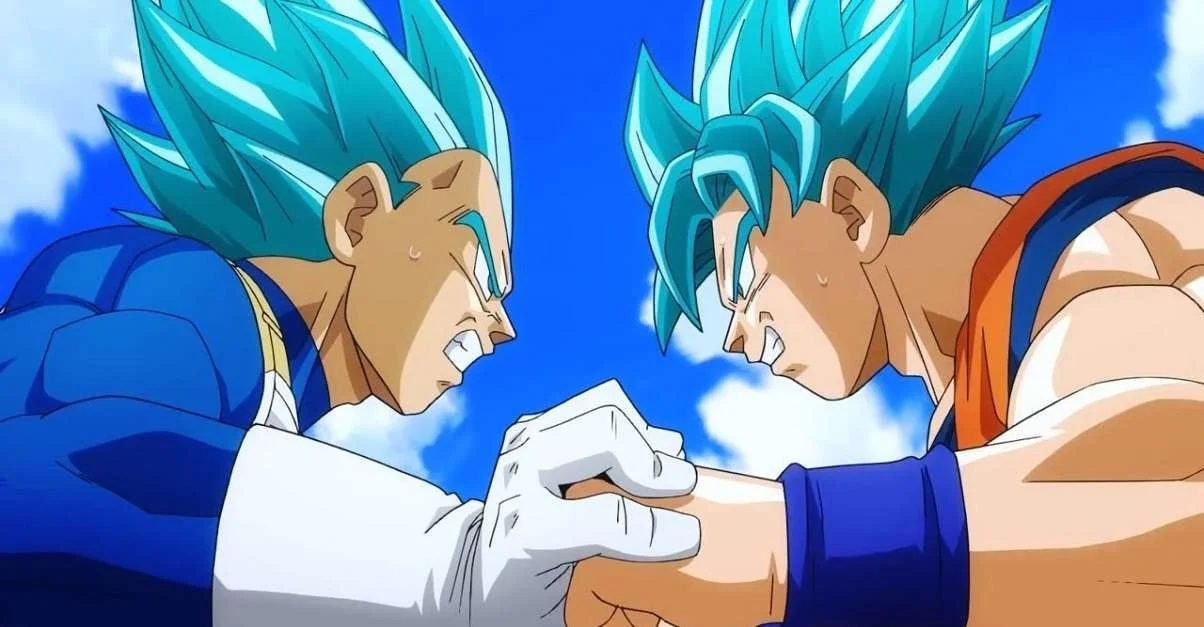

## 1) Unziping the Dataset

In [1]:
!unzip /content/dbz.zip

Archive:  /content/dbz.zip
   creating: DB dataset/
   creating: DB dataset/Training/
   creating: DB dataset/Training/goku/
  inflating: DB dataset/Training/goku/63.jpg  
  inflating: DB dataset/Training/goku/77.jpg  
  inflating: DB dataset/Training/goku/88.jpg  
  inflating: DB dataset/Training/goku/89.jpg  
  inflating: DB dataset/Training/goku/76.jpg  
  inflating: DB dataset/Training/goku/62.jpg  
  inflating: DB dataset/Training/goku/74.jpg  
  inflating: DB dataset/Training/goku/60.jpg  
  inflating: DB dataset/Training/goku/48.jpg  
  inflating: DB dataset/Training/goku/49.jpg  
  inflating: DB dataset/Training/goku/61.jpg  
  inflating: DB dataset/Training/goku/75.jpg  
  inflating: DB dataset/Training/goku/59.jpg  
  inflating: DB dataset/Training/goku/71.jpg  
  inflating: DB dataset/Training/goku/65.jpg  
  inflating: DB dataset/Training/goku/64.jpg  
  inflating: DB dataset/Training/goku/70.jpg  
  inflating: DB dataset/Training/goku/58.jpg  
  inflating: DB dataset/Train

## 2) Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
import os
import cv2

In [3]:
print(len(os.listdir('/content/DB dataset/Training/goku')))
print(len(os.listdir('/content/DB dataset/Training/vegeta')))
print(len(os.listdir('/content/DB dataset/Testing/goku')))
print(len(os.listdir('/content/DB dataset/Testing/vegeta')))

207
246
110
110


In [4]:
nrows,ncols=4,4
index=0

# 3) Data Visualizaton

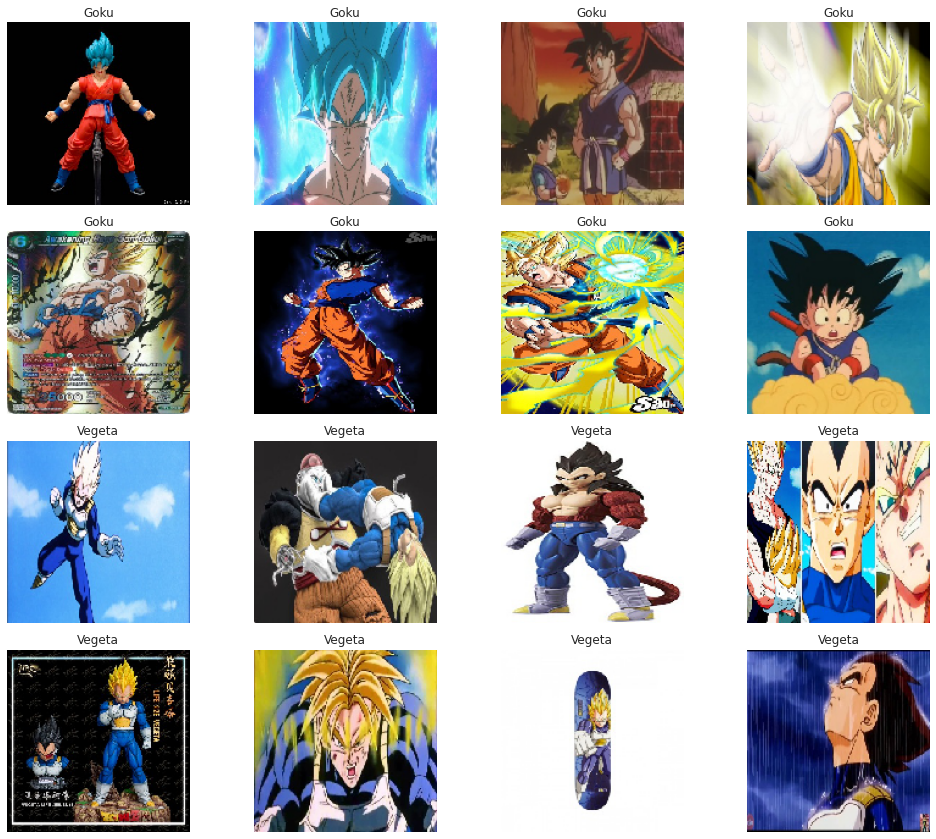

In [49]:
from tensorflow.keras.preprocessing import image

index+=8

fig=plt.figure(figsize=(14,12))
main='/content/DB dataset/Training/goku'
files=os.listdir(main)
path_1=[os.path.join(main,file) for file in files[index-8:index]]

main='/content/DB dataset/Training/vegeta'
files=os.listdir(main)
path_2=[os.path.join(main,file) for file in files[index-8:index]]

for i,img_path in enumerate(path_1+path_2):
  ax=plt.subplot(nrows,ncols,i+1)
  # fig.subplots_adjust(hspace=0.5, wspace=0.5)
  plt.tight_layout()
  ax.axis('off')
  pic=image.load_img(img_path,target_size=(150,150))
  plt.imshow(pic)
  if i<8:
    plt.title('Goku')
  else:
    plt.title('Vegeta')

## 4) Creating the Deep Neural Network Model

In [7]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [28]:
model = None
model = Sequential()
# Adding Convolution Layers
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
# Adding Neural Layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 146, 146, 64)      4864      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 69, 69, 64)        102464    
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 14, 14, 32)       

## 5) Data Preprocessing and Augmentation

In [24]:
TRAINING_DIR = "/content/DB dataset/Training/"
train_datagen = ImageDataGenerator(rescale=1.0/255., 
                                   rotation_range=40,
                                   zoom_range=0.3,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=50,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "/content/DB dataset/Testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=50,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 453 images belonging to 2 classes.
Found 220 images belonging to 2 classes.


## 6) Training the Model

In [29]:
history = model.fit(train_generator, epochs=80, steps_per_epoch=5,
                    validation_data=validation_generator)

Epoch 1/80
5/5 [==============================] - 4s 630ms/step - loss: 2.3916 - accuracy: 0.4200 - val_loss: 0.6931 - val_accuracy: 0.4909
Epoch 2/80
5/5 [==============================] - 3s 547ms/step - loss: 0.6917 - accuracy: 0.5560 - val_loss: 0.7602 - val_accuracy: 0.5000
Epoch 3/80
5/5 [==============================] - 3s 554ms/step - loss: 0.7081 - accuracy: 0.5040 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 4/80
5/5 [==============================] - 2s 465ms/step - loss: 0.6945 - accuracy: 0.4433 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 5/80
5/5 [==============================] - 2s 460ms/step - loss: 0.6899 - accuracy: 0.5517 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 6/80
5/5 [==============================] - 2s 540ms/step - loss: 0.6890 - accuracy: 0.5616 - val_loss: 0.7004 - val_accuracy: 0.5000
Epoch 7/80
5/5 [==============================] - 3s 536ms/step - loss: 0.6902 - accuracy: 0.5200 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 8/80
5/5 [====

## 7) Graphical Analysis

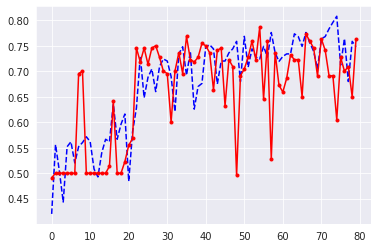

In [30]:
import seaborn as sns
sns.set_style('darkgrid')
acc=history.history['accuracy']
val_loss=history.history['val_loss']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
epochs=history.epoch

plt.plot(epochs,acc,'--',color='blue')
plt.plot(epochs, val_acc, '.-', color='red')

Text(0.5, 1.0, 'Training Loss vs Validation Loss')

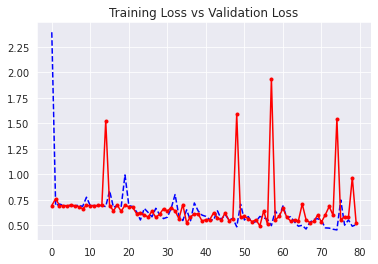

In [32]:
plt.plot(epochs,loss,'--',color='blue')
plt.plot(epochs, val_loss, '.-', color='red')
plt.title('Training Loss vs Validation Loss')

## 8) Evaluation of the CNN Model

In [31]:
test_loss, test_acc= model.evaluate(validation_generator)
print(test_acc)

5/5 [==============================] - 1s 95ms/step - loss: 0.5200 - accuracy: 0.7636
0.7636363506317139


In [ ]:
# Model has an accuracy of about 76.36%

## 9) Testing on Sample Data (Prediction)

Saving UE1HAIFdIeNhQAfGiAknLlO2o6nRFQ8zOyvG_J5KlM0.jpg.webp to UE1HAIFdIeNhQAfGiAknLlO2o6nRFQ8zOyvG_J5KlM0.jpg (1).webp
[0.43207178]

 This is Goku!



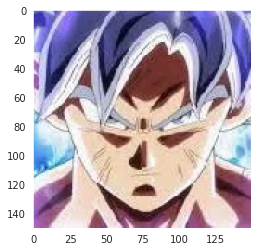

In [37]:
from google.colab import files
from keras.preprocessing import image
sns.set_style('dark')
uploaded = files.upload()

for y in uploaded.keys():
 
  # predicting images
  path = '/content/' + y
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print()
  if classes[0]<0.5:
    print(" This is Goku!")
  else:
    print(" This is Vegeta!")
print()
plt.imshow(img)

**Correct Prediction !!**

In [36]:
classes
#Since the value of classes is less than 0.5, the model predicts it to be GOKU!
#The prediction is CORRECT!

array([[0.43207178]], dtype=float32)

Saving 173193-min.png to 173193-min.png
[0.5800785]

 This is Vegeta!



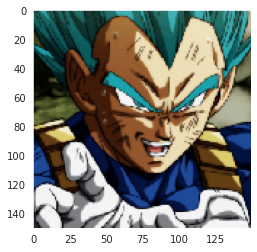

In [38]:
uploaded = files.upload()

for y in uploaded.keys():
 
  # predicting images
  path = '/content/' + y
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print()
  if classes[0]<0.5:
    print(" This is Goku!")
  else:
    print(" This is Vegeta!")
print()
plt.imshow(img)

**Correct Prediction !!**

In [ ]:
#Since the value of classes is greater than 0.5, the model predicts it to be VEGETA!
#The prediction is CORRECT!

Saving nu8_2-min.png to nu8_2-min.png
[0.34760994]

 This is Goku!



/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


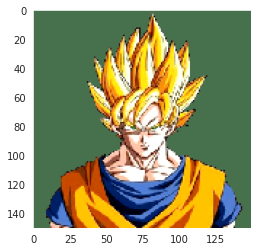

In [39]:
uploaded = files.upload()

for y in uploaded.keys():
 
  # predicting images
  path = '/content/' + y
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print()
  if classes[0]<0.5:
    print(" This is Goku!")
  else:
    print(" This is Vegeta!")
print()
plt.imshow(img)

**Correct Prediction !!**

In [ ]:
#Since the value of classes is lesser than 0.5, the model predicts it to be GOKU!
#The prediction is CORRECT!

Saving thumb-1920-145397-min.png to thumb-1920-145397-min.png
[0.58037966]

 This is Vegeta!



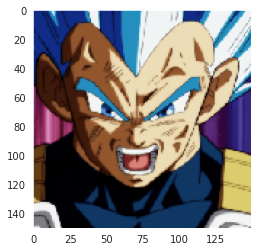

In [40]:
uploaded = files.upload()

for y in uploaded.keys():
 
  # predicting images
  path = '/content/' + y
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print()
  if classes[0]<0.5:
    print(" This is Goku!")
  else:
    print(" This is Vegeta!")
print()
plt.imshow(img)

**Correct Prediction !!**

In [41]:
#Since the value of classes is greater than 0.5, the model predicts it to be VEGETA!
#The prediction is CORRECT!

Saving 61-NUVys2bL._SY606_.jpg to 61-NUVys2bL._SY606_.jpg
[0.42117906]

 This is Goku!



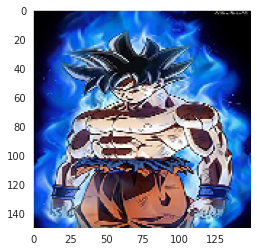

In [42]:
uploaded = files.upload()

for y in uploaded.keys():
 
  # predicting images
  path = '/content/' + y
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print()
  if classes[0]<0.5:
    print(" This is Goku!")
  else:
    print(" This is Vegeta!")
print()
plt.imshow(img)

**Correct Prediction !!**

In [ ]:
#Since the value of classes is less than 0.5, the model predicts it to be GOKU!
#The prediction is CORRECT!

In [ ]:
#. Made by ARYAMAN RAO, STUDENT, UNGERGRAD FROM DELHI TECHNOLOGICAL UNIVERSITY, INDIA